In [1]:
import numpy.random as rd
import numpy as np
import numpy
import math
from sklearn import svm
from sklearn.svm import SVR
from sklearn.svm import SVC
import random
import warnings, pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from statsmodels.tools.eval_measures import mse
from sklearn.preprocessing import MinMaxScaler

In [2]:
dataset = pd.read_csv("England dataset.csv")

scaler = MinMaxScaler()

dataset[["Unnamed: s.0"]] = scaler.fit_transform(dataset[["Unnamed: 0"]])
dataset[["Unnamed: s.1"]] = scaler.fit_transform(dataset[["Unnamed: 1"]])
dataset[["Unnamed: s.2"]] = scaler.fit_transform(dataset[["Unnamed: 2"]])
dataset[["Unnamed: s.3"]] = scaler.fit_transform(dataset[["Unnamed: 3"]])
dataset[["Unnamed: s.4"]] = scaler.fit_transform(dataset[["Unnamed: 4"]])
dataset[["Unnamed: s.5"]] = scaler.fit_transform(dataset[["Unnamed: 5"]])
dataset[["Unnamed: s.6"]] = scaler.fit_transform(dataset[["Unnamed: 6"]])
dataset[["Unnamed: s.7"]] = scaler.fit_transform(dataset[["Unnamed: 7"]])
dataset[["Unnamed: s.8"]] = scaler.fit_transform(dataset[["Unnamed: 8"]])

dataset.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: s.0,Unnamed: s.1,Unnamed: s.2,Unnamed: s.3,Unnamed: s.4,Unnamed: s.5,Unnamed: s.6,Unnamed: s.7,Unnamed: s.8
0,29,21,17,6,1,16986,17662,16263.54167,17919,0.326087,0.361446,0.695652,0.833333,1.0,0.494770,0.536862,0.534505,0.552864
1,29,21,18,6,1,18084,19097,16256.83333,18936,0.326087,0.361446,0.739130,0.833333,1.0,0.563138,0.626214,0.533760,0.616189
2,28,21,19,6,1,17798,18973,16242.83333,18637,0.315217,0.361446,0.782609,0.833333,1.0,0.545330,0.618493,0.532205,0.597572
3,28,20,20,6,1,17269,18556,16220.50000,18020,0.315217,0.349398,0.826087,0.833333,1.0,0.512391,0.592528,0.529725,0.559153
4,27,20,21,6,1,16658,17956,16196.79167,17387,0.304348,0.349398,0.869565,0.833333,1.0,0.474346,0.555168,0.527092,0.519738


In [3]:
datasett = dataset.drop(columns=["Unnamed: 0", "Unnamed: 1", "Unnamed: 2", "Unnamed: 3", "Unnamed: 4", "Unnamed: 5", "Unnamed: 6", "Unnamed: 7", "Unnamed: 8"])

datasett.head()

,Unnamed: s.0,Unnamed: s.1,Unnamed: s.2,Unnamed: s.3,Unnamed: s.4,Unnamed: s.5,Unnamed: s.6,Unnamed: s.7,Unnamed: s.8
0,0.326087,0.361446,0.695652,0.833333,1.0,0.494770,0.536862,0.534505,0.552864
1,0.326087,0.361446,0.739130,0.833333,1.0,0.563138,0.626214,0.533760,0.616189
2,0.315217,0.361446,0.782609,0.833333,1.0,0.545330,0.618493,0.532205,0.597572
3,0.315217,0.349398,0.826087,0.833333,1.0,0.512391,0.592528,0.529725,0.559153
4,0.304348,0.349398,0.869565,0.833333,1.0,0.474346,0.555168,0.527092,0.519738


In [4]:
features = datasett.iloc[:,0:8]
target = datasett.iloc[:,8]


# Replace Blank values with DataFrame.replace() methods.
import numpy as np
df2 = features.replace(r'^\s*$', np.nan, regex=True)
print(df2)

      Unnamed: s.0  Unnamed: s.1  Unnamed: s.2  Unnamed: s.3  Unnamed: s.4  \
0         0.326087      0.361446      0.695652      0.833333           1.0   
1         0.326087      0.361446      0.739130      0.833333           1.0   
2         0.315217      0.361446      0.782609      0.833333           1.0   
3         0.315217      0.349398      0.826087      0.833333           1.0   
4         0.304348      0.349398      0.869565      0.833333           1.0   
...            ...           ...           ...           ...           ...   
8715      0.315217      0.409639      0.826087      0.666667           1.0   
8716      0.304348      0.409639      0.869565      0.666667           1.0   
8717      0.304348      0.409639      0.913043      0.666667           1.0   
8718      0.304348      0.397590      0.956522      0.666667           1.0   
8719      0.304348      0.397590      1.000000      0.666667           1.0   

      Unnamed: s.5  Unnamed: s.6  Unnamed: s.7  
0         0.49

In [5]:
import numpy as np
import random
from sklearn import svm
from sklearn.metrics import r2_score

def PSO_regression(X_train, X_test, y_train, y_test, lb, ub, dim, PopSize, iters):
    # PSO parameters
    Vmax = 6
    wMax = 0.9
    wMin = 0.2
    c1 = 2
    c2 = 2
    
    # Initializations
    vel = np.zeros((PopSize, dim))

    pBestScore = np.zeros(PopSize)
    pBestScore.fill(float("inf"))

    pBest = np.zeros((PopSize, dim))
    gBest = np.zeros(dim)

    gBestScore = float("inf")

    pos = np.dot(np.random.rand(PopSize, dim), (ub - lb)) + lb

    convergence_curve = np.zeros(iters+1)
    iterations = []
    r2_scores = []

    for l in range(0, iters+1):
        for i in range(0, (pos.shape[0])):
            for j in range(0, (pos.shape[1])):
                if pos[i,j]>ub or pos[i,j]<lb:                   
                    pos[i,j]=random.uniform(0.01,10)
           
            rbf_svr = svm.SVR(kernel = 'rbf', C = pos[i][0], gamma = pos[i][1]).fit(X_train, y_train)
            y_pred = rbf_svr.predict(X_train)
            msse = mean_squared_error(y_train, y_pred)
            # Calculate fitness as the R-squared score
            fitness = msse
            if pBestScore[i] > fitness:
                pBestScore[i] = fitness
                pBest[i, :] = pos[i, :].copy()

            if gBestScore > fitness:
                gBestScore = fitness
                gBest = pos[i, :].copy()

        # Update the W of PSO
        w = wMax - l * ((wMax - wMin) / iters)

        for i in range(0, PopSize):
            for j in range(0, dim):
                r1 = random.random()
                r2 = random.random()
                vel[i, j] = (
                    w * vel[i, j]
                    + c1 * r1 * (pBest[i, j] - pos[i, j])
                    + c2 * r2 * (gBest[j] - pos[i, j])
                )

                if vel[i, j] > Vmax:
                    vel[i, j] = Vmax

                if vel[i, j] < -Vmax:
                    vel[i, j] = -Vmax

                pos[i, j] = pos[i, j] + vel[i, j]
                
        convergence_curve[l]=gBestScore
        
        iterations.append(l)
        r2_scores.append(gBestScore)
        for i in range(0, (pos.shape[0])):
            for j in range(0, (pos.shape[1])):
                if pos[i,j]>ub or pos[i,j]<lb:                   
                    pos[i,j]=random.uniform(0.01,10)
        print('----------------Count of iterations----------------' + str(l))
        print(pos)
        print('C and gamma:' + str(gBest))
        print('mean squared error:' + str(gBestScore))
      
            
    return convergence_curve,gBest,gBestScore,iterations

In [6]:
X_train,X_test,y_train,y_test= train_test_split(df2, target, test_size = 0.2, random_state = 0)

from sklearn.model_selection import GridSearchCV

In [7]:
print('----------------2. Parameter setting------------')
dim=2
lb=0.01
ub=10

iters=200
Popsize=10

----------------2. Parameter setting------------


In [8]:
convergence_curve,gBest,gBestScore,iterations = PSO_regression(X_train,X_test,y_train,y_test, lb, ub, dim, Popsize, iters) 
best_C=gBest[0]
best_gamma=gBest[1]


----------------Count of iterations----------------0
[[1.82029216 0.60613698]
 [4.17041778 0.65507865]
 [6.6665577  2.77707249]
 [4.26263122 3.10938664]
 [2.09554626 2.26767142]
 [1.38623861 2.48831275]
 [3.60591365 8.21596942]
 [1.8379042  0.34608149]
 [3.04796461 5.25620102]
 [1.59881971 2.7348972 ]]
C and gamma:[1.82029216 0.60613698]
mean squared error:0.0017785817131088422
----------------Count of iterations----------------1
[[1.8554976  0.14855665]
 [0.39129298 8.37913355]
 [3.51864033 8.49091573]
 [8.28995098 3.13996608]
 [0.11335049 5.99986499]
 [0.57414582 0.10538041]
 [4.93488944 2.21596942]
 [1.77404168 9.72964052]
 [2.21794211 2.46498099]
 [8.38160489 8.54685163]]
C and gamma:[1.8379042  0.34608149]
mean squared error:0.0017402542231449573
----------------Count of iterations----------------2
[[1.88115438 9.58264778]
 [9.3455876  2.37913355]
 [1.59463878 2.49091573]
 [2.28995098 5.46664581]
 [4.37972769 1.90214499]
 [2.29333862 6.21775248]
 [8.46091472 1.53738258]
 [1.795698

----------------Count of iterations----------------22
[[0.8663854  3.01445436]
 [4.50638077 6.42942471]
 [6.99308736 7.7592561 ]
 [9.01842974 8.62935587]
 [2.5974908  1.71086168]
 [2.31597194 2.5875779 ]
 [1.94318814 3.51998476]
 [0.70061222 6.85779114]
 [6.48039028 3.55049301]
 [1.67365796 0.714211  ]]
C and gamma:[5.23456835 0.18958607]
mean squared error:0.0016497636644884873
----------------Count of iterations----------------23
[[2.21612694 4.32057031]
 [2.11754028 0.42942471]
 [0.51433442 1.7592561 ]
 [3.01842974 2.62935587]
 [2.93055671 1.41936609]
 [1.73226906 4.77127761]
 [4.1819664  2.12749255]
 [6.70061222 0.85779114]
 [3.8846981  2.83645334]
 [7.67365796 4.24809016]]
C and gamma:[5.23456835 0.18958607]
mean squared error:0.0016497636644884873
----------------Count of iterations----------------24
[[5.38273391 2.1461029 ]
 [8.11754028 6.34314172]
 [6.51433442 2.57479289]
 [7.08289854 6.17574722]
 [3.96470802 4.20111563]
 [5.29013672 6.3496634 ]
 [8.44963004 6.17518012]
 [2.739

----------------Count of iterations----------------44
[[6.62332612 6.33218596]
 [4.96435719 3.53851248]
 [8.57006316 6.79827691]
 [4.64872269 1.86477075]
 [3.11863455 4.49320488]
 [2.07219335 6.50815426]
 [6.87171207 7.22774242]
 [5.24775565 8.44672997]
 [3.28115341 7.45999228]
 [3.56235812 9.25502156]]
C and gamma:[5.23456835 0.18958607]
mean squared error:0.0016497636644884873
----------------Count of iterations----------------45
[[3.64655597 0.33218596]
 [4.62019607 3.35121226]
 [6.51342187 0.79827691]
 [4.86917875 6.16468058]
 [7.70659278 4.24573403]
 [5.9734781  0.50815426]
 [8.7840771  1.22774242]
 [2.52050822 2.44672997]
 [4.7530257  1.45999228]
 [6.22729144 3.25502156]]
C and gamma:[5.23456835 0.18958607]
mean squared error:0.0016497636644884873
----------------Count of iterations----------------46
[[7.25385125 4.94058286]
 [4.98817932 5.22312633]
 [6.32852527 9.95808281]
 [5.21901463 0.16468058]
 [8.13030548 7.03848489]
 [7.22379309 3.49310875]
 [3.670154   4.65757699]
 [0.612

----------------Count of iterations----------------66
[[8.68090465 9.84292275]
 [5.23866464 4.17344091]
 [6.49421511 1.60735239]
 [6.17296348 2.14893949]
 [3.76897773 1.06844412]
 [2.05824204 0.05829108]
 [2.05204461 4.63852542]
 [0.49489884 0.801289  ]
 [3.1730367  0.46770143]
 [5.96847864 4.1258471 ]]
C and gamma:[5.23456835 0.18958607]
mean squared error:0.0016497636644884873
----------------Count of iterations----------------67
[[4.49526287 3.84292275]
 [5.21776237 1.36505854]
 [9.93777872 0.84972211]
 [5.03127677 7.74742662]
 [3.92089251 1.57365447]
 [7.76503399 1.85358828]
 [4.54327437 3.34016859]
 [6.32085904 4.44451559]
 [2.24760582 4.51431003]
 [0.16098149 0.76846338]]
C and gamma:[5.23456835 0.18958607]
mean squared error:0.0016497636644884873
----------------Count of iterations----------------68
[[4.03511859 1.51315609]
 [5.36690269 3.8388265 ]
 [8.72192393 9.08824335]
 [4.72698669 1.74742662]
 [9.92089251 4.7504404 ]
 [1.76503399 2.40523776]
 [3.59477576 7.30796698]
 [6.194

----------------Count of iterations----------------88
[[4.86215384 1.90520695]
 [5.21602366 0.96606707]
 [6.24056115 1.59022867]
 [5.22255112 0.5108456 ]
 [6.27741669 1.16168026]
 [3.53303334 2.10018303]
 [5.20425384 6.4226805 ]
 [7.30424287 0.25336343]
 [5.33091237 7.36096966]
 [1.78208795 0.20753664]]
C and gamma:[5.23456835 0.18958607]
mean squared error:0.0016497636644884873
----------------Count of iterations----------------89
[[7.33842737 2.19814228]
 [5.2216949  4.16821585]
 [5.29081033 8.37899517]
 [5.22822673 9.00822675]
 [7.25398418 6.07851557]
 [2.90060619 2.37705965]
 [5.23538724 0.4226805 ]
 [7.08229798 1.15607003]
 [5.59371288 1.36096966]
 [1.36677898 9.09189245]]
C and gamma:[5.23456835 0.18958607]
mean squared error:0.0016497636644884873
----------------Count of iterations----------------90
[[6.60506634 2.62874946]
 [5.24134381 8.65338461]
 [8.10831034 2.37899517]
 [5.21891771 3.00822675]
 [5.91437097 0.07851557]
 [5.37363862 6.1787251 ]
 [5.25262526 9.71624422]
 [6.072

----------------Count of iterations----------------110
[[2.85369739 1.38151435]
 [5.21375917 0.53802002]
 [4.66686654 1.41269753]
 [5.25058444 1.43632198]
 [0.784892   2.3300124 ]
 [5.28115681 4.7697429 ]
 [5.23416326 1.46547794]
 [5.23296227 2.47629626]
 [2.72292574 6.46072592]
 [6.63050456 2.17303199]]
C and gamma:[5.23553545 0.1787251 ]
mean squared error:0.0016464990865268836
----------------Count of iterations----------------111
[[4.82190856 3.97718082]
 [5.23716097 6.05566242]
 [6.09326538 9.0544691 ]
 [5.24454127 5.72114932]
 [6.784892   6.12116323]
 [5.18280787 8.72913837]
 [5.23431038 0.90892499]
 [5.2256532  6.92577566]
 [2.12116413 0.46072592]
 [0.63050456 5.37321143]]
C and gamma:[5.23553545 0.1787251 ]
mean squared error:0.0016464990865268836
----------------Count of iterations----------------112
[[3.38080219 7.61198237]
 [5.21871933 0.05566242]
 [5.47961051 3.0544691 ]
 [5.22791296 8.30708881]
 [7.22176752 0.12116323]
 [5.28452729 2.72913837]
 [5.23509887 6.77915815]
 [5.

----------------Count of iterations----------------132
[[3.15200639 0.51788568]
 [5.2909687  8.8666092 ]
 [5.81402694 7.71787884]
 [5.20926409 6.42412535]
 [7.75990841 0.06805249]
 [5.23549644 1.84300762]
 [5.23577894 6.93743312]
 [5.11459193 1.75560458]
 [3.27021426 2.31586533]
 [1.20941529 6.27886791]]
C and gamma:[5.23553545 0.1787251 ]
mean squared error:0.0016464990865268836
----------------Count of iterations----------------133
[[4.44870436 3.43672631]
 [5.19452209 2.8666092 ]
 [5.16438137 1.71787884]
 [5.20648899 0.42412535]
 [6.15429387 0.77250408]
 [5.23567038 2.2761667 ]
 [5.23590812 0.93743312]
 [5.01096215 2.37840104]
 [3.31679051 9.23103501]
 [7.20941529 0.27886791]]
C and gamma:[5.23553545 0.1787251 ]
mean squared error:0.0016464990865268836
----------------Count of iterations----------------134
[[3.20739061 0.11958394]
 [5.20464508 9.28213813]
 [5.9265074  8.9720502 ]
 [5.26869166 8.81472027]
 [5.73635736 1.19574236]
 [5.23537457 8.2452692 ]
 [5.23538864 0.62513957]
 [5.

----------------Count of iterations----------------154
[[2.82136704 5.69314481]
 [5.22682659 5.86258938]
 [5.41793876 1.65058363]
 [5.21063724 4.01919385]
 [6.4636484  1.06533767]
 [5.23553503 7.966823  ]
 [5.23559043 6.25838428]
 [5.0298305  0.22182862]
 [3.49910667 1.58071785]
 [4.61201898 6.66250971]]
C and gamma:[5.23553545 0.1787251 ]
mean squared error:0.0016464990865268836
----------------Count of iterations----------------155
[[5.37371437 0.22849524]
 [5.22385934 0.33947769]
 [5.37671828 9.5409481 ]
 [5.23487013 1.12270553]
 [5.2140699  4.05826763]
 [5.23553525 1.966823  ]
 [5.23558819 0.25838428]
 [5.24106586 4.46479061]
 [6.45423552 4.86973029]
 [6.31255506 1.38899891]]
C and gamma:[5.23553545 0.1787251 ]
mean squared error:0.0016464990865268836
----------------Count of iterations----------------156
[[4.22204762 8.00830925]
 [5.22054857 4.50426274]
 [5.25139553 3.5409481 ]
 [5.21988705 6.23970485]
 [7.00239706 4.62112175]
 [5.23553575 7.61602423]
 [5.23603787 5.72920177]
 [5.

----------------Count of iterations----------------176
[[5.25586098 2.67457295]
 [5.22608542 2.01847698]
 [6.07761362 3.57485085]
 [5.22827587 1.10060708]
 [8.33675973 8.16937514]
 [5.23553545 2.25021556]
 [5.23593261 0.44608184]
 [6.00742158 3.77618206]
 [4.12918964 0.97771624]
 [6.60404047 3.47019733]]
C and gamma:[5.23553545 0.1787251 ]
mean squared error:0.0016464990865268836
----------------Count of iterations----------------177
[[5.23303589 8.73905708]
 [5.22404926 4.6228768 ]
 [4.79738863 6.8939301 ]
 [5.23616721 4.07753105]
 [5.23049762 2.16937514]
 [5.23553545 0.88824986]
 [5.23580174 2.10724184]
 [4.28164814 0.14807051]
 [4.52893516 6.06955317]
 [0.60404047 8.15754157]]
C and gamma:[5.23553545 0.1787251 ]
mean squared error:0.0016464990865268836
----------------Count of iterations----------------178
[[5.23507936 2.73905708]
 [5.23748341 5.70317466]
 [6.0427149  0.8939301 ]
 [5.20325619 7.65219008]
 [6.39951566 6.60434914]
 [5.23553545 0.25075701]
 [5.23538757 2.05211353]
 [4.

----------------Count of iterations----------------198
[[5.18794691 3.30200044]
 [4.89887635 7.64597989]
 [6.32575164 2.30364338]
 [5.18748268 0.08722176]
 [5.93573743 2.15278787]
 [4.98337848 9.00254779]
 [5.03946668 1.83384151]
 [4.97622487 4.42564071]
 [3.44193475 6.45734787]
 [7.23901362 8.16895951]]
C and gamma:[4.97480636 0.1900039 ]
mean squared error:0.0016344188028744166
----------------Count of iterations----------------199
[[5.20469964 8.59452708]
 [5.11098309 1.64597989]
 [5.65905762 0.37677673]
 [5.03121712 0.1195599 ]
 [5.75576752 6.47946837]
 [5.17563502 3.00254779]
 [5.10653277 0.93175503]
 [4.97431401 4.33873208]
 [6.3301406  0.45734787]
 [1.26823515 2.16895951]]
C and gamma:[4.97480636 0.1900039 ]
mean squared error:0.0016344188028744166
----------------Count of iterations----------------200
[[4.87288038 2.59452708]
 [5.3528203  0.92433625]
 [4.86682196 8.52017789]
 [4.95193725 0.2343713 ]
 [6.45951692 0.47946837]
 [5.06213399 9.07525547]
 [4.8932062  2.05987886]
 [4.

In [9]:
print('----------------4. The result shows-----------------')
print("The best C is " + str(best_C))
print("The best gamma is " + str(best_gamma))
print("......gBest...")
print(gBest)
print("........convergence_curve.........")
print(convergence_curve)

----------------4. The result shows-----------------
The best C is 4.974806355290078
The best gamma is 0.1900038967561201
......gBest...
[4.97480636 0.1900039 ]
........convergence_curve.........
[0.00177858 0.00174025 0.00174025 0.00174025 0.00167938 0.00167938
 0.00167938 0.00167938 0.00167938 0.00167938 0.00167938 0.00167938
 0.00167938 0.00166801 0.00166801 0.00164976 0.00164976 0.00164976
 0.00164976 0.00164976 0.00164976 0.00164976 0.00164976 0.00164976
 0.00164976 0.00164976 0.00164976 0.00164976 0.00164976 0.00164976
 0.00164976 0.00164976 0.00164976 0.00164976 0.00164976 0.00164976
 0.00164976 0.00164976 0.00164976 0.00164976 0.00164976 0.00164976
 0.00164976 0.00164976 0.00164976 0.00164976 0.00164976 0.00164976
 0.00164976 0.00164976 0.00164976 0.00164976 0.00164976 0.00164976
 0.00164976 0.00164976 0.00164976 0.00164976 0.00164976 0.00164976
 0.00164976 0.00164976 0.00164976 0.00164976 0.00164976 0.00164976
 0.00164976 0.00164976 0.00164976 0.00164976 0.00164976 0.00164976


In [10]:
##rbf_svm = svm.SVR()
##rbf_svm.fit(X_train,y_train)
rbf_svr = svm.SVR(kernel = 'rbf', C = best_C, gamma = best_gamma).fit(X_train, y_train) 
y_pred =rbf_svr.predict(X_test)
y_pred=y_pred.reshape(-1,1)

y_pred=scaler.inverse_transform(y_pred)
print(y_pred)
accuracies = cross_val_score(rbf_svr,X_test,y_test,cv =3, scoring='neg_mean_squared_error')
y_test=np.array(y_test)
y_test=y_test.reshape(-1,1)
y_test=scaler.inverse_transform(y_test)
print(y_test)

[[18778.45796962]
 [10443.98861909]
 [13260.96188427]
 ...
 [16238.73491325]
 [17778.73833433]
 [13492.10092259]]
[[18746.]
 [ 9889.]
 [14192.]
 ...
 [16269.]
 [17109.]
 [13116.]]


In [11]:
#accuracy_mean= accuracies.mean()
#accuracies.std()*100
from sklearn.metrics import mean_absolute_percentage_error
mse = mean_squared_error(y_test, y_pred)
rmse = numpy.sqrt(mse)
print("SVR RESULTS - C AND GAMMA PARAMETERS OPTIMIZED BY PSO optimization")
print("RMSE =", rmse)
print("MSE =", mse)
mapr=mean_absolute_percentage_error(y_test, y_pred)
print("MAPR = ",mapr*100)
#print("K-fold accuracy mean",accuracy_mean)

SVR RESULTS - C AND GAMMA PARAMETERS OPTIMIZED BY PSO optimization
RMSE = 644.20599430301
MSE = 415001.3630959298
MAPR =  3.709981777465632


In [12]:
from sklearn.metrics import mean_squared_error
a=mean_squared_error(y_test,y_pred)
print(a)

415001.3630959298


In [14]:
from sklearn.metrics import mean_absolute_percentage_error
mape=mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("SVR RESULTS - C AND GAMMA PARAMETERS OPTIMIZED BY PSO optimization")
print("MSE =", mse)
print("MAPE  = ",mape*100)

SVR RESULTS - C AND GAMMA PARAMETERS OPTIMIZED BY PSO optimization
MSE = 415001.3630959298
MAPE  =  3.709981777465632


Text(0, 0.5, 'error')

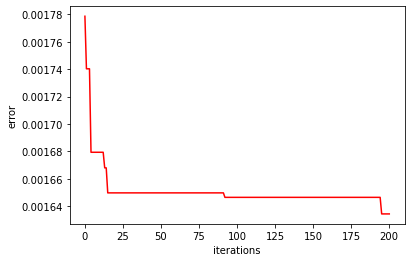

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(iterations,convergence_curve,color='red')
plt.xlabel('iterations')
plt.ylabel('error')